# Лабораторная работа №3

### Задание:  
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.

2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков. 

3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.

4. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.

5. Произведите подбор гиперпараметра K с использованием GridSearchCV и RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Используйте не менее двух стратегий кросс-валидации.
  
6. Сравните метрики качества исходной и оптимальной моделей.  

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Описание датасета
---
**Датасет:** [ссылка](https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset/data)

---

ID: A unique identifier for each individual

Age: The age of the individual
 
Gender: The gender of the individual

Height: The height of the individual in centimeters

Weight: The weight of the individual in kilograms

BMI: The body mass index of the individual, calculated as weight divided by height squared 
 
Label: The obesity classification of the individual, which can be one of the following:
- Normal Weight
- Overweight
- Obese
- Underweight

In [4]:
data = pd.read_csv('obesity_classification.csv')
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


### Подготовка данных

In [6]:
# Удалим колонку ID
data.drop(columns=['ID'], axis=1, inplace=True)

In [7]:
# Кодируем категориальные признаки Gender и Label
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
columns_to_encode = ['Gender', 'Label']  
for col in columns_to_encode:
    data[col + '_encoded'] = label_encoder.fit_transform(data[col])
    
data.head()

,Age,Gender,Height,Weight,BMI,Label,Gender_encoded,Label_encoded
0,25,Male,175,80,25.3,Normal Weight,1,0
1,30,Female,160,60,22.5,Normal Weight,0,0
2,35,Male,180,90,27.3,Overweight,1,2
3,40,Female,150,50,20.0,Underweight,0,3
4,45,Male,190,100,31.2,Obese,1,1


In [8]:
data.drop(['Gender', 'Label'], axis=1, inplace=True)
data.head()

,Age,Height,Weight,BMI,Gender_encoded,Label_encoded
0,25,175,80,25.3,1,0
1,30,160,60,22.5,0,0
2,35,180,90,27.3,1,2
3,40,150,50,20.0,0,3
4,45,190,100,31.2,1,1


In [ ]:
data.describe() # -> масштабирование не требуется

,Age,Height,Weight,BMI,Gender_encoded,Label_encoded
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,46.555556,166.574074,59.490741,20.549074,0.518519,1.787037
std,24.720620,27.873615,28.856233,7.583818,0.501986,1.260848
min,11.000000,120.000000,10.000000,3.900000,0.000000,0.000000
25%,27.000000,140.000000,35.000000,16.700000,0.000000,0.000000
50%,42.500000,175.000000,55.000000,21.200000,1.000000,2.000000
75%,59.250000,190.000000,85.000000,26.100000,1.000000,3.000000
max,112.000000,210.000000,120.000000,37.200000,1.000000,3.000000


### Разделение выборки

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop('Label_encoded', axis=1)
Y = data['Label_encoded']

X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [13]:
# Размер обучающей выборки
X_train.shape, Y_train.shape

((86, 5), (86,))

In [12]:
# Размер тестовой выборки
X_test.shape, Y_test.shape

((22, 5), (22,))

In [14]:
np.unique(Y_train)

array([0, 1, 2, 3])

In [15]:
np.unique(Y_test)

array([0, 1, 2, 3])

Вывод: функция train_test_split разделила исходную выборку таким образом, чтобы в обучающей и тестовой частях сохранились все классы.

### KNN для произвольно заданного гиперпараметра K

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train, Y_train)

knn10 = KNeighborsClassifier(n_neighbors = 10)
knn10.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

#### Accuracy

In [17]:
Y_predict_5 = knn5.predict(X_test)
Y_predict_10 = knn10.predict(X_test)

print("Точность при K=5: ", accuracy_score(Y_test, Y_predict_5))
print("Точность при K=10: ", accuracy_score(Y_test, Y_predict_10))

Точность при K=5:  0.6818181818181818
Точность при K=10:  0.7727272727272727


Посмотрим accuracy по классам

In [18]:
from typing import Dict

def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [19]:
print_accuracy_score_for_classes(Y_test, Y_predict_5)

Метка 	 Accuracy
0 	 0.5555555555555556
1 	 1.0
2 	 0.3333333333333333
3 	 0.8571428571428571


In [20]:
print_accuracy_score_for_classes(Y_test, Y_predict_10)

Метка 	 Accuracy
0 	 0.6666666666666666
1 	 1.0
2 	 0.3333333333333333
3 	 1.0


Вывод: разная accuracy для разных классов.

#### Матрица ошибок
Количество верно и ошибочно классифицированных данных, представленное в виде матрицы.

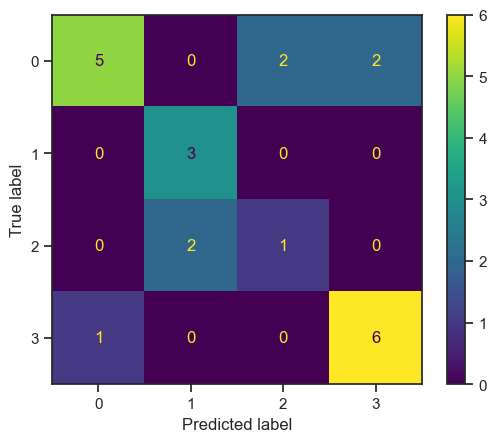

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_predict_5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

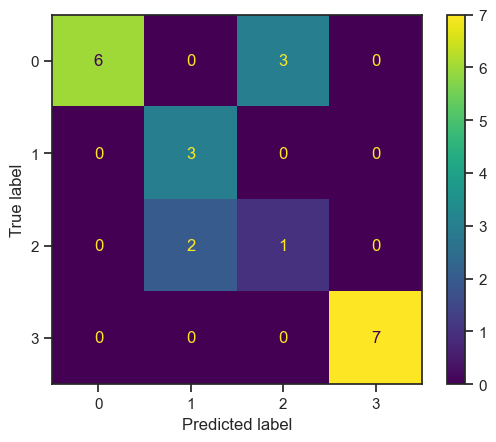

In [32]:
cm = confusion_matrix(Y_test, Y_predict_10)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Подбор гиперпараметра K с помощью GridSearchCV, RandomizedSearchCV и кросс-валидации

**Перекрестная проверка** — метод оценки аналитической модели и её поведения на независимых данных.   
При оценке модели имеющиеся в наличии данные разбиваются на k частей. Затем на k−1 частях данных производится обучение модели, а оставшаяся часть данных используется для тестирования.   
Процедура повторяется k раз; в итоге каждая из k частей данных используется для тестирования. В результате получается оценка эффективности выбранной модели с наиболее равномерным использованием имеющихся данных.  

Каждую из k частей принято называть *fold (фолд)*.  
Количество фолдов при кросс-валидации обычно обозначают *параметром cv*.  
В результате каждого обучения и проверки модели формируются указанные разработчиком метрики качества модели.  
Например, в результате кросс-валидации для 3 фолдов при решении задачи классификации мы можем получить 3 значения accuracy, которые были вычислены для каждой комбинации фолдов. Полученные метрики обычно усредняют.

**Стратегии кросс-валидации** основаны на том, что разработчик задает или *количество разбиений* (в этом случае автоматически определяются размеры обучающей и тестовой выборок для каждого разбиения) или *размер обучающей или тестовой выборки для одного разбиения* (в этом случае автоматически определяется количество разбиений).

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, ShuffleSplit

# GridSearchCV: Полный перебор гиперпараметров.
# RandomizedSearchCV: Выбор гиперпараметров случайным образом.

# KFold: Разбивает данные на K частей (работает в соответствии с определением кросс-валидации).
# ShuffleSplit: Генерируется N случайных перемешиваний данных, в каждом перемешивании заданная доля помещается в тестовую выборку.

knn = KNeighborsClassifier()

# задание сетки гиперпараметров 
n_range = np.array(range(2, 30, 2))
param_grid = {'n_neighbors': n_range} 

# задание стратегий кросс-валидации
cv_kfold = KFold(n_splits=5, shuffle=True, random_state=5) #shuffle - перемешивание данных
cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.2, random_state=5)

# подбор гиперпараметра K с помощью GridSearchCV и оценка качества с помощью кросс-валидации
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=cv_kfold)
grid_search.fit(X_train, Y_train)

print("Best parameters (GridSearchCV):", grid_search.best_params_)
print("Best accuracy (GridSearchCV):", grid_search.best_score_)

# подбор гиперпараметра K с помощью RandomizedSearchCV и оценка качества с помощью кросс-валидации
random_search = RandomizedSearchCV(knn, param_grid, scoring='accuracy', cv=cv_shuffle)
random_search.fit(X_train, Y_train)

print("Best parameters (RandomizedSearchCV):", random_search.best_params_)
print("Best accuracy (RandomizedSearchCV):", random_search.best_score_)

Best parameters (GridSearchCV): {'n_neighbors': np.int64(8)}
Accuracy (GridSearchCV): 0.8241830065359478
Best parameters (RandomizedSearchCV): {'n_neighbors': np.int64(6)}
Accuracy (RandomizedSearchCV): 0.7888888888888889
